# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [188]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data=pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
                     
# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [189]:
# Display the number of unique mice IDs
unique_mice= merged_data["Mouse ID"].nunique()
# Checking the number of mice.
unique_mice

249

In [190]:
# Our data should be uniquely identified by Mouse ID and Timepoint
    # Check for any mouse ID with duplicate time points

duplicated_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_ID= duplicated_mice["Mouse ID"]

duplicated_ID.unique()

array(['g989'], dtype=object)

In [191]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [192]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
Number_of_mince= len(cleaned_data['Mouse ID'].unique())

Number_of_mince

248

## Summary Statistics

In [193]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group the data by 'Drug Regimen' and calculate the required statistics
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better readability
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Print the summary statistics DataFrame
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [194]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [195]:
# Advanced method for statistic summary

# Calculate the summary statistics using groupby and summary statistical methods
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Create a DataFrame from the resulting series
summary_df = pd.DataFrame(summary_stats, columns=['mean', 'median', 'var', 'std', 'sem'])

# Define the title
title = "Tumor Volume (mm3)"

# Calculate the width of the table
table_width = len(summary_df.columns) * 12

# Print the title aligned to the right
print(f"{title:>{table_width}}")
summary_df


                                          Tumor Volume (mm3)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

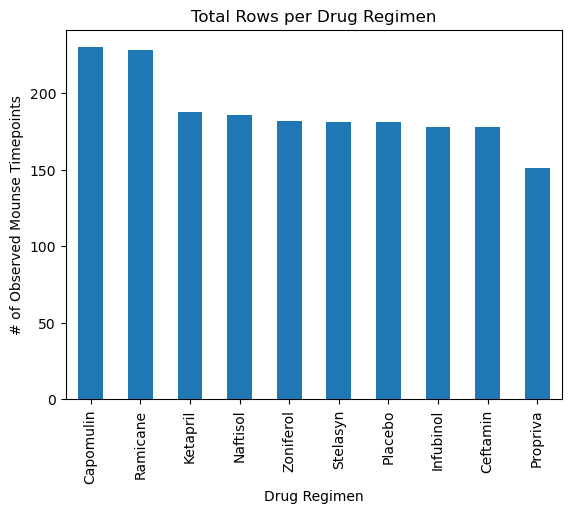

In [196]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Create the bar plot using Pandas plot() method
drug_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mounse Timepoints', title='Total Rows per Drug Regimen')

# Show the plot
plt.show()


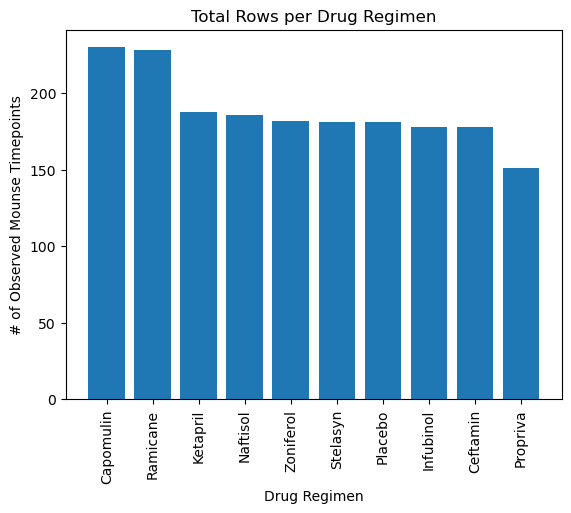

In [197]:
# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Create the bar plot using Matplotlib's pyplot methods
plt.bar(drug_counts.index, drug_counts.values)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mounse Timepoints')
plt.title('Total Rows per Drug Regimen')

# Rotate the x-axis tick labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


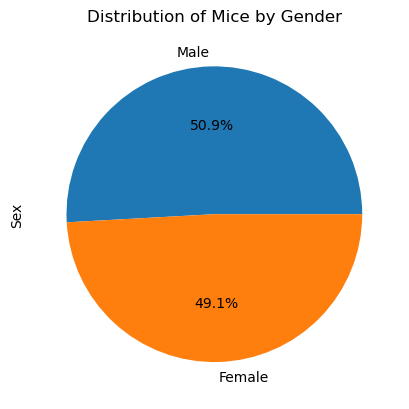

In [198]:

# Assuming you have a DataFrame named 'merged_data' with a column 'Sex'

# Calculate the distribution of female versus male mice
gender_counts = cleaned_data['Sex'].value_counts()

# Create the pie plot using Pandas plot() method
gender_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Male', 'Female'], title='Distribution of Mice by Gender')

# Show the plot
plt.show()


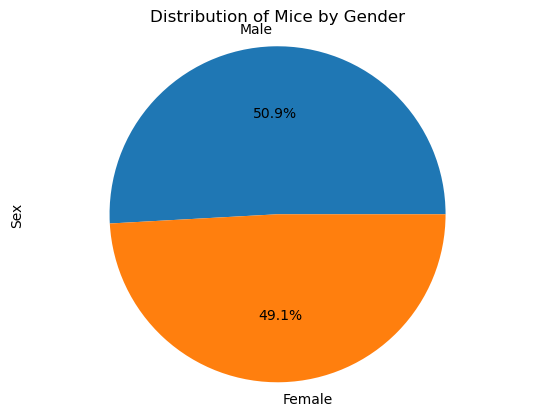

In [199]:
# Calculate the distribution of female versus male mice
gender_counts = cleaned_data['Sex'].value_counts()

# Create the pie plot using Matplotlib's pyplot methods
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Mice by Gender')

# Set the y-axis label as 'Sex' and rotate it vertically
plt.ylabel('Sex', rotation=90)

# Set the aspect ratio to make the pie circular
plt.axis('equal')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [201]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



In [202]:
# Group the cleaned DataFrame by 'Mouse ID' and get the maximum timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Convert the resulting Series to a DataFrame
last_timepoint_df = pd.DataFrame(last_timepoint)

# Reset the index of the DataFrame
last_timepoint_df = last_timepoint_df.reset_index()


In [203]:
# Merge the last timepoint DataFrame with the original cleaned DataFrame to obtain the final tumor volume
combined_data = pd.merge(last_timepoint_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Select only the relevant columns: 'Mouse ID', 'Drug Regimen', and 'Tumor Volume'
final_tumor_volume = combined_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]


In [204]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [173]:
# Put treatments into a list for the for loop and plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers for each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Check for potential outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print the results
    print(f"{treatment}'s potential outliers:")
    print(outliers)
    print()


Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



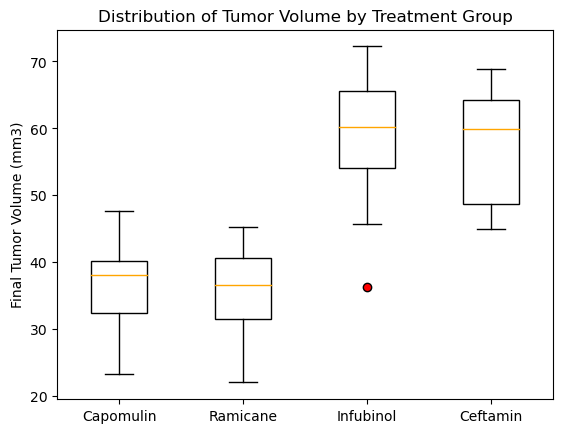

In [207]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a list to store the tumor volume for each treatment group
tumor_vol_data = []

# Iterate through each treatment group and collect the tumor volume data
for treatment in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
    tumor_vol_data.append(final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'])

# Create the box plot using Matplotlib
boxplot = plt.boxplot(tumor_vol_data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], patch_artist=True)

# Set the y-label
plt.ylabel('Final Tumor Volume (mm3)')

# Set the title
plt.title('Distribution of Tumor Volume by Treatment Group')

# Set the color of the boxes and whiskers
for box in boxplot['boxes']:
    # Change the fill color
    box.set(facecolor='white')
    # Change the edge color
    box.set(edgecolor='black')

# Set the color of the medians
for median in boxplot['medians']:
    median.set(color='orange')

# Set the color of the fliers (outliers)
for flier in boxplot['fliers']:
    flier.set(marker='o', color='red', markerfacecolor='red', markeredgecolor='black')

# Show the plot
plt.show()


## Line and Scatter Plots

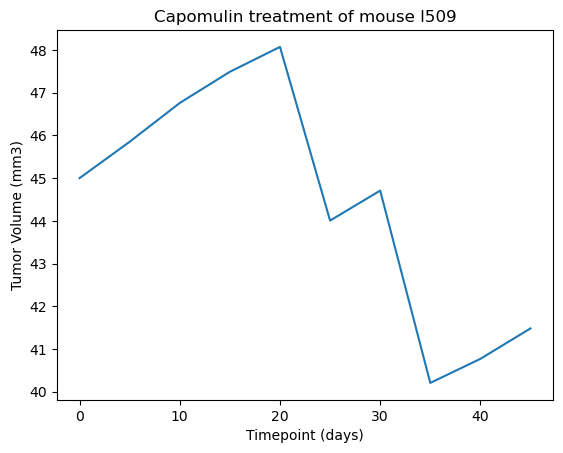

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


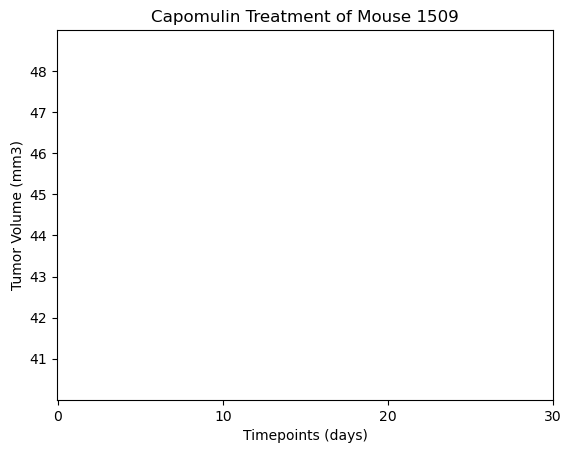

In [227]:
# Assuming you have a DataFrame named 'merged_data' with columns 'Mouse ID', 'Drug Regimen', 'Timepoint', and 'Tumor Volume'

import matplotlib.pyplot as plt

# Filter the DataFrame to select only Capomulin-treated mice
capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']

# Choose a specific mouse from the Capomulin-treated mice
selected_mouse = '1509'  # Replace '1509' with the desired Mouse ID

# Extract the time points and tumor volume data for the selected mouse
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == selected_mouse]
timepoints = mouse_data['Timepoint']
tumor_volume = mouse_data['Tumor Volume (mm3)']

# Generate the line plot of tumor volume vs. time point
plt.plot(timepoints, tumor_volume, marker='o', linestyle='--')

# Set the x-axis label and y-axis label
plt.xlabel('Timepoints (days)')
plt.ylabel('Tumor Volume (mm3)')

# Set the title of the plot
plt.title(f'Capomulin Treatment of Mouse {selected_mouse}')

# Set the x-axis ticks
plt.xticks([0, 10, 20, 30])

# Set the y-axis ticks and limits
plt.yticks(range(41, 49))
plt.ylim(40, 49)

# Show the plot
plt.show()


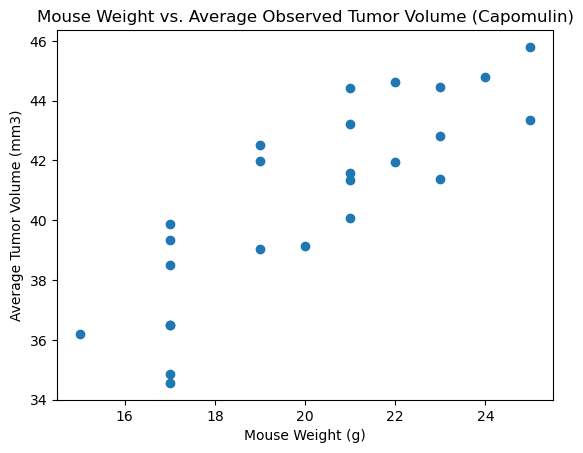

In [228]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average observed tumor volume for each mouse in the Capomulin treatment regimen
capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate the scatter plot of mouse weight versus average observed tumor volume
plt.scatter(mouse_weights, average_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume (Capomulin)')
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


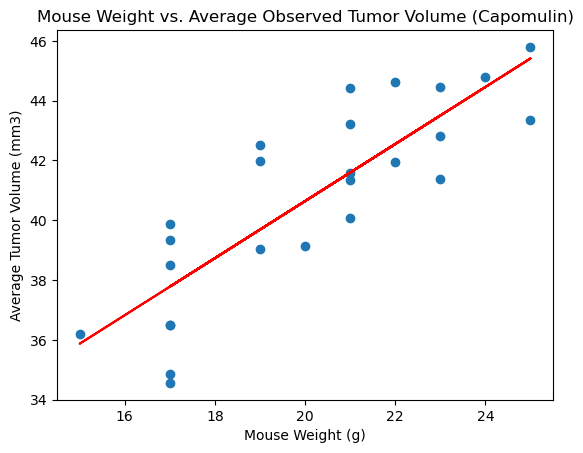

In [230]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Calculate the correlation coefficient between mouse weight and average observed tumor volume
correlation_coefficient = np.corrcoef(mouse_weights, average_tumor_volume)[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression between mouse weight and average observed tumor volume
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)
regression_line = slope * mouse_weights + intercept

# Plot the linear regression model on top of the scatter plot
plt.scatter(mouse_weights, average_tumor_volume)
plt.plot(mouse_weights, regression_line, color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume (Capomulin)')
plt.show()